 Importing warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

Importing required libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Change the view option in dataset to see entire dataset

In [3]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

loading the dataset

In [4]:
# Application Data set
inp0=pd.read_csv("application_data.csv")

# Previous Data set
inp1=pd.read_csv("previous_application.csv")

Checking Metadata of Application Dataset

In [5]:
#Shape
inp0.shape

(307511, 122)

In [6]:
# Info
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Unique Values in each column
inp0.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [8]:
# Null value sum in each column

inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
# Data Types of all column
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


 Handling Missing Value


In [10]:
# Dropping columns having more than 40% of null values

inp0.drop(["OWN_CAR_AGE","EXT_SOURCE_1"], axis=1, inplace=True)
inp0.drop(inp0.loc[:,"APARTMENTS_AVG":"EMERGENCYSTATE_MODE"].columns, axis=1, inplace=True)

In [11]:
# Dropping columns from which no insight are found or are of no use during analyzing for example
# Does the client OWNS Car or not or What is the age of its Car, So from these we cannot say that client is Defaulter or Not so dropping such columns


inp0.drop(["FLAG_OWN_CAR","FLAG_OWN_REALTY"], axis=1, inplace=True)
inp0.drop(inp0.loc[:,"FLAG_MOBIL":"FLAG_EMAIL"].columns, axis=1, inplace=True)
inp0.drop(inp0.loc[:,"WEEKDAY_APPR_PROCESS_START":"LIVE_CITY_NOT_WORK_CITY"].columns, axis=1, inplace=True)
inp0.drop(inp0.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE":"FLAG_DOCUMENT_2"].columns, axis=1, inplace=True)
inp0.drop(inp0.loc[:,"FLAG_DOCUMENT_4":"FLAG_DOCUMENT_21"].columns, axis=1, inplace=True)
inp0.drop(inp0.loc[:,"AMT_REQ_CREDIT_BUREAU_WEEK":"AMT_REQ_CREDIT_BUREAU_YEAR"].columns, axis=1, inplace=True)


In [12]:
# checking the shape of dataset
inp0.shape

(307511, 29)

Imputing or replacing null values

In [13]:
# Checking Gender column for any missing or Null value
inp0.CODE_GENDER.value_counts()
# Here found "XNA" which is an in invalid variable in Gender column so replacing it with mode value of gender column.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [14]:
# finding mode of gender column
inp0.CODE_GENDER.mode()[0]

'F'

In [15]:
# Imputing or replacing the null values

inp0.CODE_GENDER=inp0.CODE_GENDER.replace(["XNA"],"F")

In [16]:
# Checking null value in other columns

inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
FLAG_DOCUMENT_3                    0
A

In [17]:
# Imputing value in AMT_ANNUITY  column , as the column is contionous numerical type so based on skewnees value 
# we will impute values.
# Finding Skewness Value
inp0.AMT_ANNUITY.skew()

1.5797773638612507

In [18]:
# As Skewness value coming beyond 0.5 and -0.5 range so will impute median value 
inp0.AMT_ANNUITY.fillna(inp0.AMT_ANNUITY.median(), inplace=True)

In [19]:
# Finding Skewness Value of AMT_GOODS_PRICE column
inp0.AMT_GOODS_PRICE.skew()

1.3490003414747445

In [20]:
# Imputing median value in AMT_GOODS_PRICE column as its Skewness value is beyond 0.5 and -0.5 range

inp0.AMT_GOODS_PRICE.fillna(inp0.AMT_GOODS_PRICE.median(), inplace=True)

In [21]:
# Imputing value in NAME_TYPE_SUITE column as it is categorical column so imputing mode value in it
# Find out the mode of NAME_TYPE_SUITE column

inp0.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [22]:
# Imputing mode value in NAME_TYPE_SUITE column

inp0.NAME_TYPE_SUITE.fillna(inp0.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [23]:
# Imputing value in OCCUPATION_TYPE column as it is categorical column so imputing mode value in it
# Find out the mode of OCCUPATION_TYPE column
inp0.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [24]:
# Imputing mode value in OCCUPATION_TYPE column

inp0.OCCUPATION_TYPE.fillna(inp0.OCCUPATION_TYPE.mode()[0], inplace=True)

In [25]:
# Imputing Value in EXT_SOURCE_2 column as it is numerical column so base on skewness value will impute appropriate value
# Finding the Skewness Value of EXT_SOURCE_2 column
inp0.EXT_SOURCE_2.skew()

-0.7935760449636996

In [26]:
#As Skewness value coming beyond 0.5 and -0.5 range so will impute median value 
inp0.EXT_SOURCE_2.fillna(inp0.EXT_SOURCE_2.median(), inplace=True)

In [27]:
# Imputing Value in EXT_SOURCE_3 column as it is numerical column so base on skewness value will impute appropriate value
# Finding the Skewness Value of EXT_SOURCE_3 column
inp0.EXT_SOURCE_3.skew()

-0.4093904596160267

In [28]:
#As Skewness value coming in 0.5 and -0.5 range so will impute mean value 
inp0.EXT_SOURCE_3.fillna(inp0.EXT_SOURCE_3.mean(), inplace=True)

In [29]:
# Imputing Value in AMT_REQ_CREDIT_BUREAU_HOUR column as it is categorical numerical column so imputing mode value 
# Finding the mode
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]

0.0

In [30]:
# Imputing value in AMT_REQ_CREDIT_BUREAU_HOUR column
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace=True)

In [31]:
# Imputing Value in AMT_REQ_CREDIT_BUREAU_DAY column as it is categorical numerical column so imputing mode value 
# Finding the mode
inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]

0.0

In [32]:
# Imputing value in AMT_REQ_CREDIT_BUREAU_DAY column
inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace=True)

In [33]:
# Imputing value in CNT_FAM_MEMBERS column as it is categorical numerical column so imputing mode value 
# Finding the mode
inp0.CNT_FAM_MEMBERS.mode()[0]

2.0

In [34]:
# Imputing mode value in CNT_FAM_MEMBERS column
inp0.CNT_FAM_MEMBERS.fillna(inp0.CNT_FAM_MEMBERS.mode()[0], inplace=True)

In [35]:
# Cross Checking for any null value remaining in dataset
inp0.isnull().sum()
# So now  No Null values present in application dataset

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
FLAG_DOCUMENT_3                0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
dtype: int64

In [36]:
# Now change DAYS_BIRTH column variable in terms of Years and change dtype into int for ease in analyze
inp0.DAYS_BIRTH=inp0.DAYS_BIRTH/365*-1
inp0.DAYS_BIRTH=inp0.DAYS_BIRTH.astype("int")

In [37]:
# Now change DAYS_ID_PUBLISH column variable in terms of Years and change dtype into int for ease in analyze
inp0.DAYS_ID_PUBLISH=inp0.DAYS_ID_PUBLISH/365*-1
inp0.DAYS_ID_PUBLISH=inp0.DAYS_ID_PUBLISH.astype("int")

In [38]:
# Now change DAYS_EMPLOYED column variable in terms of Years and change dtype into int for ease in analyze
inp0.DAYS_EMPLOYED=inp0.DAYS_EMPLOYED/365*-1
inp0.DAYS_EMPLOYED=inp0.DAYS_EMPLOYED.astype("int")

In [39]:
# Now change DAYS_REGISTRATION column variable in terms of Years and change dtype into int for ease in analyze
inp0.DAYS_REGISTRATION=inp0.DAYS_REGISTRATION/365*-1
inp0.DAYS_REGISTRATION=inp0.DAYS_REGISTRATION.astype("int")

Now Application Dataset is cleaned

Previous Dataset Shape (Before Cleaning)=(307511, 122)

After Cleaning Dataset shape = (307511, 29)

 Now Checking Metadata Of Previous Application Dataset

In [40]:
# Info
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [41]:
#Shape of Dataset
inp1.shape

(1670214, 37)

In [42]:
# Unique Value in Dataset
inp1.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [43]:
# Null Values in Dataset
inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [44]:
# Data types
inp1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

Handling Missing Values in Previous application dataset

In [45]:
# Dropping columns having Null Values more than 40%
inp1.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","NAME_TYPE_SUITE","NFLAG_INSURED_ON_APPROVAL","DAYS_TERMINATION","DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE","DAYS_FIRST_DRAWING"], axis=1, inplace=True)

In [46]:
# Dropping columns from which no insight are found or are of no use during analyzing
inp1.drop(inp1.loc[:,"WEEKDAY_APPR_PROCESS_START":"NFLAG_LAST_APPL_IN_DAY"].columns, axis=1, inplace=True)
inp1.drop(["SK_ID_PREV"], axis=1, inplace=True)
inp1.drop(["DAYS_DECISION"], axis=1, inplace=True)
inp1.drop(inp1.loc[:,"NAME_PRODUCT_TYPE":"PRODUCT_COMBINATION"].columns, axis=1, inplace=True)

Imputing or replacing null values 

In [47]:
# Checking for null values 
inp1.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
dtype: int64

In [48]:
# Imputing Value in AMT_ANNUITY column as it is numerical column so base on skewness value will impute appropriate value
# Finding the Skewness Value of AMT_ANNUITY column

inp1.AMT_ANNUITY.skew()

2.6925715126729455

In [49]:
#As Skewness value coming beyond 0.5 and -0.5 range so will impute median value 
inp1.AMT_ANNUITY.fillna(inp1.AMT_ANNUITY.median(), inplace=True)

In [50]:
# Imputing Value in AMT_GOODS_PRICE column as it is numerical column so base on skewness value will impute appropriate value
# Finding the Skewness Value of AMT_GOODS_PRICE column

inp1.AMT_GOODS_PRICE.skew()

3.0736896781923937

In [51]:
#As Skewness value coming beyond 0.5 and -0.5 range so will impute median value 
inp1.AMT_GOODS_PRICE.fillna(inp1.AMT_GOODS_PRICE.median(), inplace=True)

In [52]:
# Imputing Value in AMT_CREDIT column as it is numerical column so base on skewness value will impute appropriate value
# Finding the Skewness Value of AMT_CREDIT column

inp1.AMT_CREDIT.skew()

3.2458146495467357

In [53]:
#As Skewness value coming beyond 0.5 and -0.5 range so will impute median value 
inp1.AMT_CREDIT.fillna(inp1.AMT_CREDIT.median(), inplace=True)

In [54]:
# Now Cross-Checking for null values  if any again
inp1.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
dtype: int64

In [55]:
inp1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
0,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS
1,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,XNA,Cash
2,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash
3,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash
4,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash


In [56]:
# Checking PAYMENT_TYPE column for any missing or Null value
inp1.NAME_PAYMENT_TYPE.value_counts()
# Here found "XNA" which is an in invalid variable in PAYMENT_TYPE column so replacing it with mode value of NAME_PAYMENT_TYPE column.

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [57]:
# Finding mode of NAME_PAYMENT_TYPE column
inp1.NAME_PAYMENT_TYPE.mode()[0]

'Cash through the bank'

In [58]:
# Imputing mode value in NAME_PAYMENT_TYPE column as it is a categorical column
inp1.NAME_PAYMENT_TYPE=inp1.NAME_PAYMENT_TYPE.replace("XNA","Cash through the bank")

### Now merging dataset

In [59]:
inp2=inp0.merge(inp1,on="SK_ID_CURR", how="inner")

In [60]:
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9,5,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,1,0.0,0.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,Cash through the bank,XAP,New,Vehicles,POS
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3,0,Core staff,2.0,1,1,School,0.622246,0.510853,1,0.0,0.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3,0,Core staff,2.0,1,1,School,0.622246,0.510853,1,0.0,0.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,POS
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3,0,Core staff,2.0,1,1,School,0.622246,0.510853,1,0.0,0.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11,6,Laborers,1.0,2,2,Government,0.555912,0.729567,0,0.0,0.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,Cash through the bank,XAP,New,Mobile,POS


## Analyzing Outliers

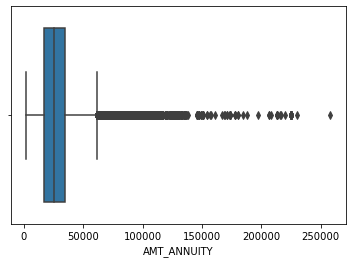

In [61]:
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

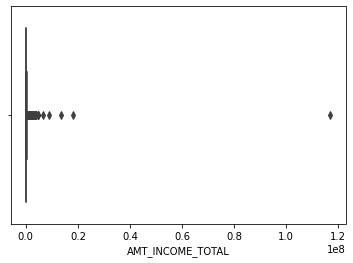

In [62]:
sns.boxplot(inp0.AMT_INCOME_TOTAL,orient="h")
plt.show()

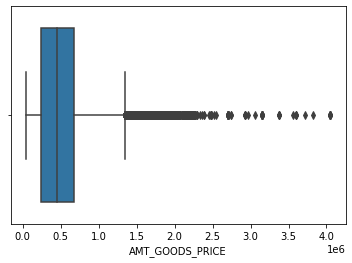

In [63]:
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

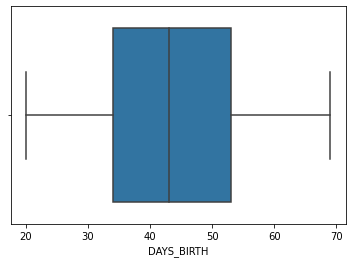

In [64]:
sns.boxplot(inp0.DAYS_BIRTH)
plt.show()

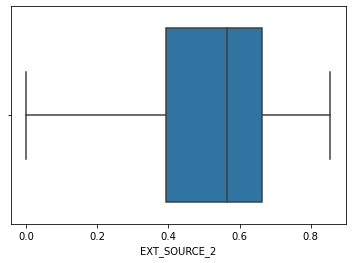

In [65]:
sns.boxplot(inp0.EXT_SOURCE_2)
plt.show()

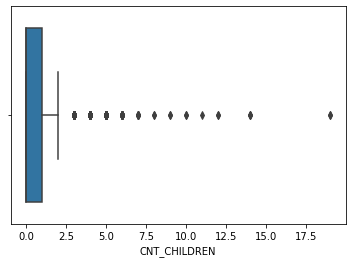

In [66]:
sns.boxplot(inp0.CNT_CHILDREN)
plt.show()

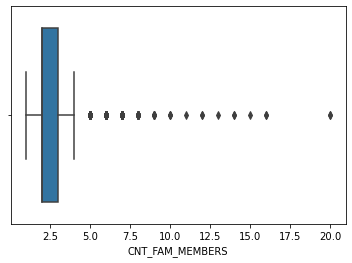

In [67]:
sns.boxplot(inp0.CNT_FAM_MEMBERS)
plt.show()

## DATA IMBALANCE

In [68]:
inp0.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

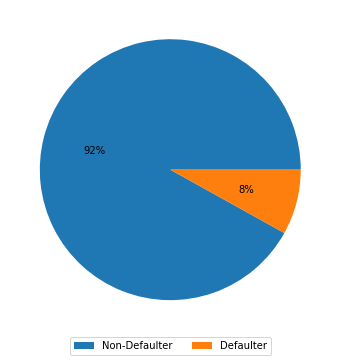

In [69]:
Label=["Non-Defaulter","Defaulter"]
plt.figure(figsize=(8,6))
plt.pie(inp0.TARGET.value_counts(normalize=True),autopct='%1.0f%%')

plt.legend(labels=Label, loc='center', 
           bbox_to_anchor=(0.5, -0.04), ncol=6)
plt.show()

# Univariate Analysis

### Univariate Analysis of Categorical column

Analysis of CNT_CHILDREN column


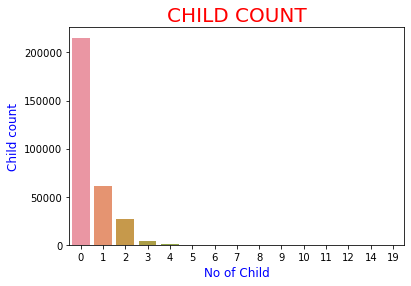

In [70]:
sns.countplot(data=inp0, x="CNT_CHILDREN")
plt.xticks(rotation=0)
plt.xlabel("No of Child",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Child count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("CHILD COUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'reD'})
plt.show()

Analysis of CODE_GENDER Column

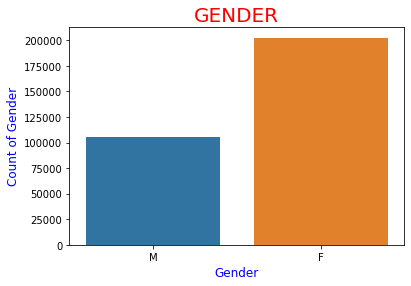

In [71]:
sns.countplot(data=inp0, x="CODE_GENDER")
plt.xlabel("Gender",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count of Gender",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("GENDER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.xticks(rotation=0)
plt.show()

Analysis of NAME_CONTRACT_TYPE column

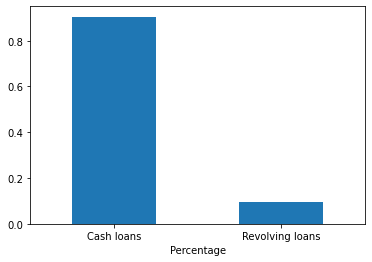

In [72]:
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Percentage")
plt.show()

Analysis of NAME_TYPE_SUITE Column

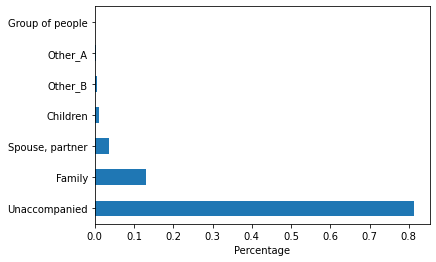

In [73]:
inp0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.xlabel("Percentage")
plt.show()

Analysis of NAME_EDUCATION_TYPE Column

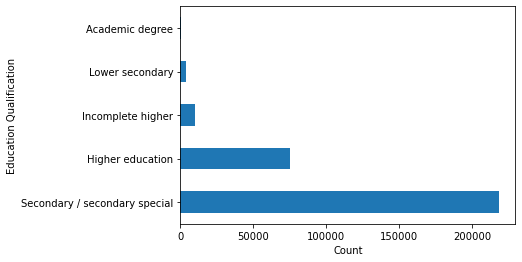

In [74]:
inp0.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Education Qualification")
plt.show()

Analysis of NAME_FAMILY_STATUS Column

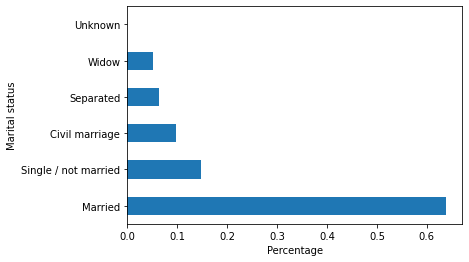

In [75]:
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.xlabel("Percentage")
plt.ylabel("Marital status")
plt.show()

Analysis of NAME_HOUSING_TYPE Column

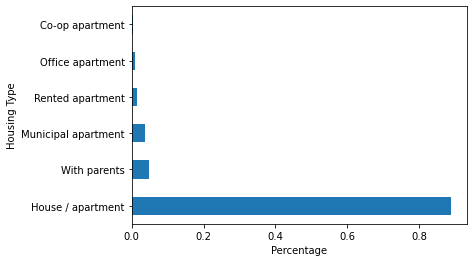

In [76]:
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.xlabel("Percentage")
plt.ylabel("Housing Type")
plt.show()

Analysis of REGION_RATING_CLIENT Column

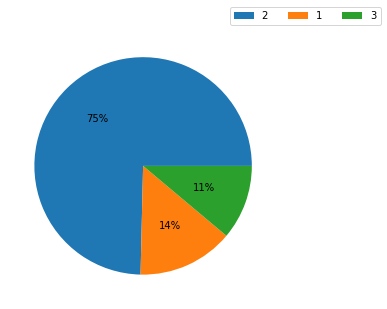

In [77]:
plt.figure(figsize=(5,5))
Label=["2","1","3"]
plt.pie(inp0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True),autopct='%1.0f%%')
plt.legend(labels=Label, loc='lower left', 
           bbox_to_anchor=(0.8, 1.0), ncol=6)
plt.xticks(rotation=0)
plt.show()

Analysis of FLAG_DOCUMENT_3 Column

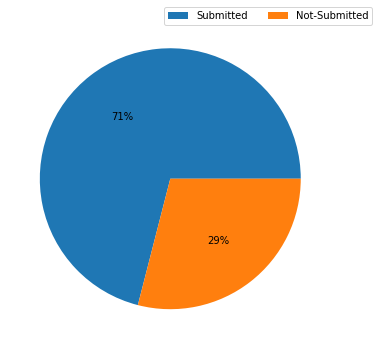

In [78]:
Label=["Submitted","Not-Submitted"]
plt.figure(figsize=(8,6))
plt.pie(inp0.FLAG_DOCUMENT_3.value_counts(normalize=True),autopct='%1.0f%%')
plt.legend(labels=Label, loc='center', 
           bbox_to_anchor=(0.8, 1.0), ncol=6)
plt.show()

Analysis of FLAG_DOCUMENT_3 Column

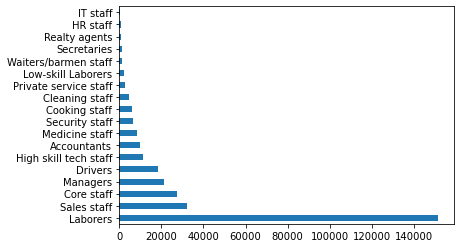

<Figure size 504x720 with 0 Axes>

In [79]:
inp0.OCCUPATION_TYPE.value_counts().plot.barh()
plt.figure(figsize=(7,10))
plt.show()


Analysis of ORGANIZATION_TYPE Column

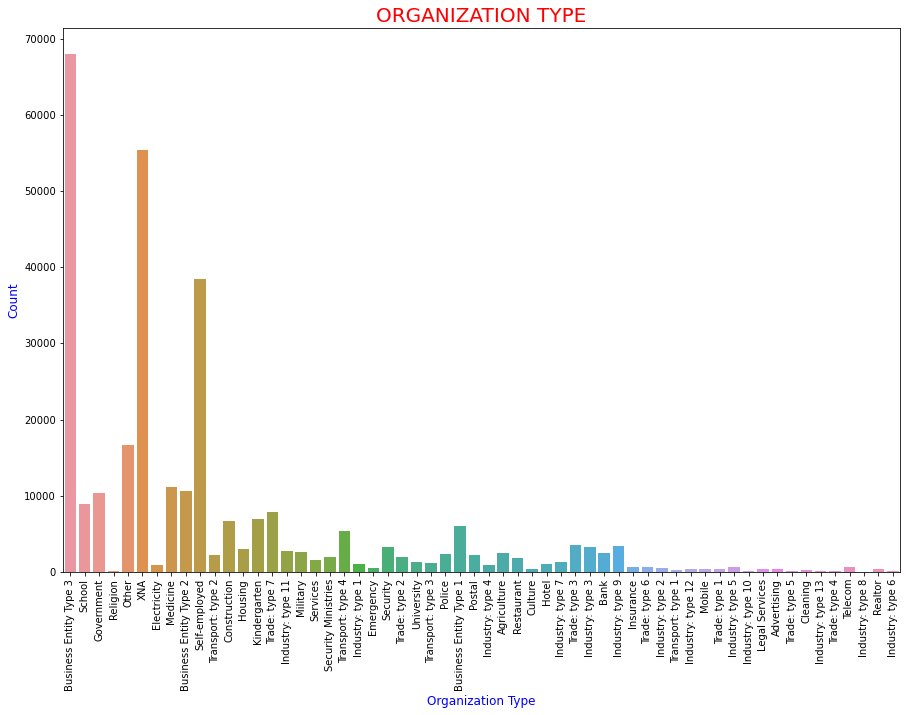

In [80]:
plt.figure(figsize=(15,10))
sns.countplot(inp0.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.xlabel("Organization Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("ORGANIZATION TYPE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

### Univariate Analysis of Numerical column

Analysis on AMT_INCOME_TOTAL column

In [81]:
# Converting of AMT_INCOME_TOTAL for easy understanding 
# Creating bins of AMT_INCOME_TOTAL column to get it analyse
Bins_range=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,150000000]
LABEL=["0-100K","100-200K","200-300K","300-400K","400-500K","500-600K","600-700K","700-800K","800-900K","900-1M","1M above"]
inp0["Income"]=pd.cut(inp0["AMT_INCOME_TOTAL"], Bins_range, labels=LABEL)

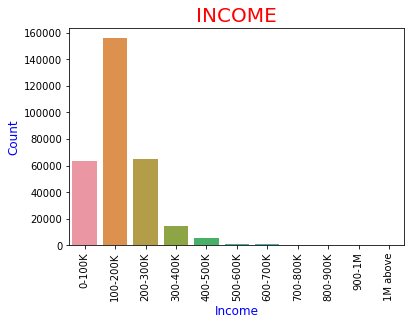

In [82]:
sns.countplot(data=inp0, x="Income")
plt.xticks(rotation=90)
plt.xlabel("Income",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("INCOME",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

Analysis of Amount of Goods column

In [83]:
#  Converting and Binning the AMT_GOODS_PRICE column for easy analysis
inp0["AMT_GOODS_PRICE"]=inp0.AMT_GOODS_PRICE/100000
Bins_range=[0,5,10,15,20,25,30,35,40,45]
LABEL=["0-500K","500K-1M","1M-1.5M","1.5M-2M","2M-2.5M","2.5M-3M","3M-3.5M","3.5M-4M","4M-4.5M"]
inp0["Amount_of_goods"]=pd.cut(inp0["AMT_GOODS_PRICE"], Bins_range, labels=LABEL)


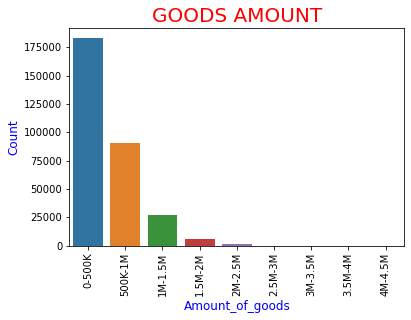

In [84]:
sns.countplot(data=inp0, x="Amount_of_goods")
plt.xticks(rotation=90)
plt.xlabel("Amount_of_goods",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("GOODS AMOUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

Analysis on AMT_CREDIT column

In [85]:
# Converting of AMT_CREDIT for easy understanding 
# Creating bins of AMT_CREDIT column to get it analyse
inp0["AMT_CREDIT_A"]=inp0.AMT_CREDIT/100000
Bins_range=[0,5,10,15,20,25,30,35,40,45]
LABEL=["0-500K","500K-1M","1M-1.5M","1.5M-2M","2M-2.5M","2.5M-3M","3M-3.5M","3.5M-4M","4M-4.5M"]

inp0["AMT_CREDIT_A"]=pd.cut(inp0["AMT_CREDIT_A"], Bins_range, labels=LABEL)

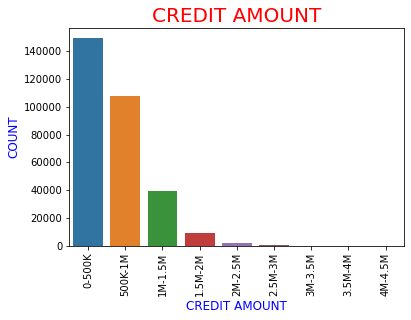

In [86]:
sns.countplot(data=inp0, x="AMT_CREDIT_A")
plt.xticks(rotation=90)
plt.xlabel("CREDIT AMOUNT",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("COUNT",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("CREDIT AMOUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

Analysis of AMT_ANNUITY Column

In [87]:
# Converting of AMT_ANNUITY for easy understanding 
# Creating bins of AMT_ANNUITY column to get it analyse
inp0["AMT_ANNUITY_A"]=inp0.AMT_ANNUITY/1000
Bins_range=[0,5,10,15,20,25,30]
LABEL=["0-5K","5K-10K","10K-15K","15K-20K","20K-25K","25K-30K"]
inp0["AMT_ANNUITY_A"]=pd.cut(inp0["AMT_ANNUITY_A"], Bins_range, labels=LABEL)

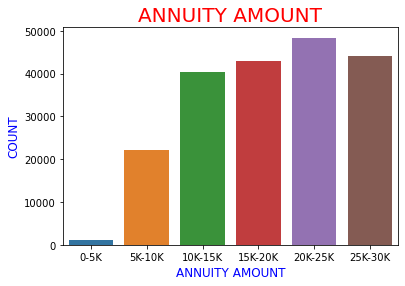

In [88]:
sns.countplot(data=inp0, x="AMT_ANNUITY_A")
plt.xlabel("ANNUITY AMOUNT",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("COUNT",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("ANNUITY AMOUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

Analysis of REGION_POPULATION_RELATIVE column

In [89]:
Bins_range=[0,.01,.02,.03,.04,.05,.06,.07,.08]
LABEL=["0-0.01","0.01-0.02","0.02-0.03","0.03-0.04","0.04-0.05","0.05-0.06","0.06-0.07","0.07-0.08"]
inp0["REGION_POPULATION_RELATIVE_A"]=pd.cut(inp0["REGION_POPULATION_RELATIVE"], Bins_range, labels=LABEL)

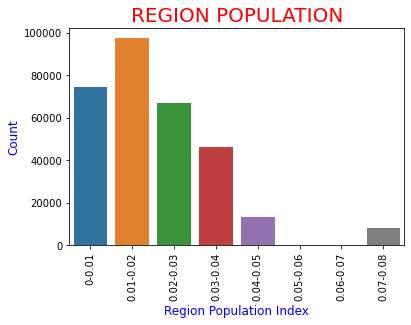

In [90]:
sns.countplot(data=inp0, x="REGION_POPULATION_RELATIVE_A")
plt.xticks(rotation=90)
plt.xlabel("Region Population Index",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("REGION POPULATION",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

Analysis of DAY_BIRTH Column

In [91]:
# Creating Bins for DAYS_BIRTH column for analysing it.
Bins_range=[0,10,20,30,40,50,60]
LABEL=["0-10","10-20","20-30","30-40","40-50","50-60"]
inp0["DAYS_BIRTH_IN_YEAR"]=pd.cut(inp0["DAYS_BIRTH"],Bins_range, LABEL)

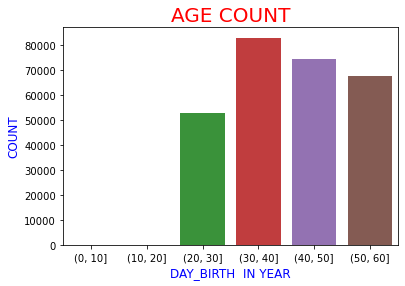

In [92]:
sns.countplot(data=inp0, x="DAYS_BIRTH_IN_YEAR")
plt.ylabel("COUNT",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("DAY_BIRTH  IN YEAR",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("AGE COUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RED'})
plt.show()

### Bivariate analysis

Analysis CODE_GENDER vs Target column

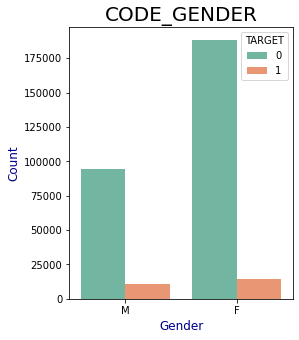

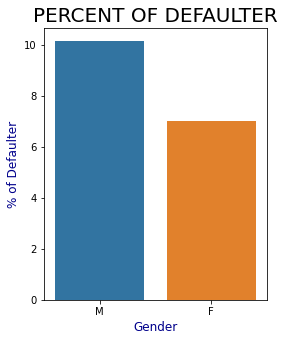

In [93]:

Target_Percent=inp0[["CODE_GENDER","TARGET"]].groupby(["CODE_GENDER"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)

plt.figure(figsize=(4,5))
sns.countplot(data=inp0, x="CODE_GENDER", hue="TARGET", palette="Set2")
plt.xlabel("Gender",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("CODE_GENDER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


plt.figure(figsize=(4,5))
sns.barplot(data=Target_Percent, x="CODE_GENDER", y="TARGET", order=Target_Percent["CODE_GENDER"])
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.xlabel("Gender",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Analysis of AMT_INCOME_TOTAL vs TARGET column


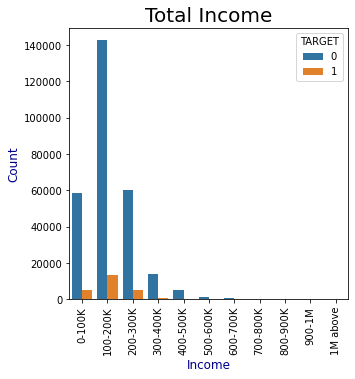

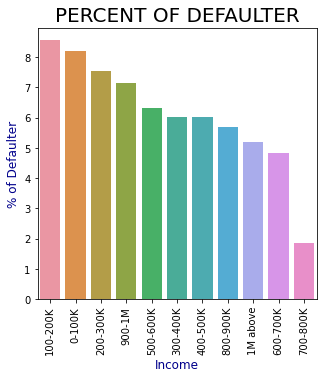

In [94]:
Target_Percent=inp0[["Income","TARGET"]].groupby(["Income"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)

plt.figure(figsize=(5,5))
sns.countplot(data=inp0, x="Income", hue="TARGET")
plt.xticks(rotation=90)
plt.xlabel("Income",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("Total Income",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=Target_Percent, x="Income", y="TARGET", order=Target_Percent["Income"])
plt.xticks(rotation=90)
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.xlabel("Income",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


Analysis of CNT_CHILDREN vs TARGET column

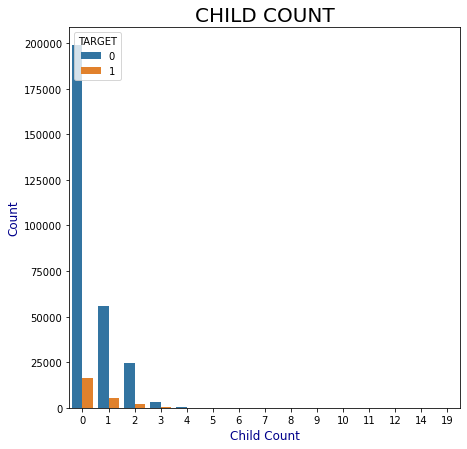

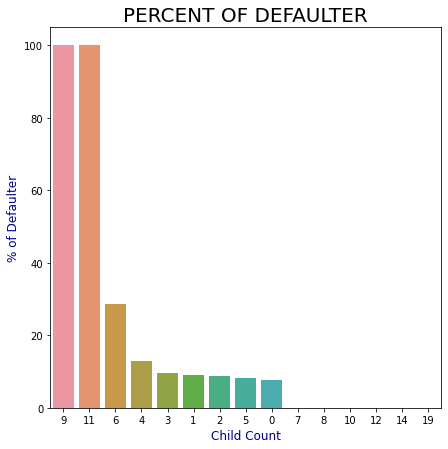

In [95]:

Target_Percent=inp0[["CNT_CHILDREN","TARGET"]].groupby(["CNT_CHILDREN"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)

plt.figure(figsize=(7,7))
sns.countplot(data=inp0, x="CNT_CHILDREN", hue="TARGET")
plt.xlabel("Child Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("CHILD COUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

plt.figure(figsize=(7,7))
sns.barplot(data=Target_Percent, x="CNT_CHILDREN", y="TARGET", order=Target_Percent["CNT_CHILDREN"])
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.xlabel("Child Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


Analysis of NAME_INCOME_TYPE vs TARGET Column

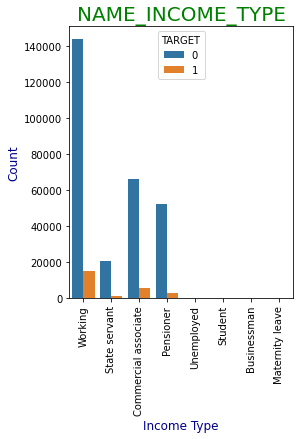

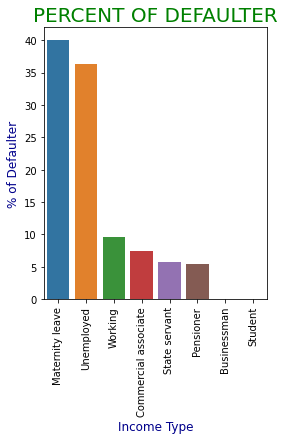

In [96]:

Target_Percent=inp0[["NAME_INCOME_TYPE","TARGET"]].groupby(["NAME_INCOME_TYPE"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(4,5))
sns.countplot(data=inp0, x="NAME_INCOME_TYPE", hue="TARGET")
plt.xlabel("Income Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.xticks(rotation=90)
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("NAME_INCOME_TYPE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

plt.figure(figsize=(4,5))
sns.barplot(data=Target_Percent, x="NAME_INCOME_TYPE", y="TARGET", order=Target_Percent["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.xlabel("Income Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()


Analysis of NAME_EDUCATION_TYPE vs TARGET Column


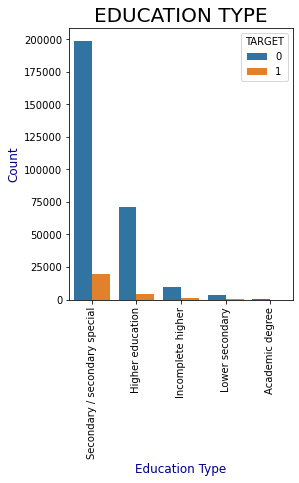

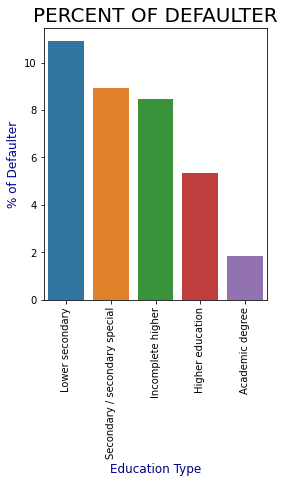

In [97]:
Target_Percent=inp0[["NAME_EDUCATION_TYPE","TARGET"]].groupby(["NAME_EDUCATION_TYPE"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(4,5))
sns.countplot(data=inp0, x="NAME_EDUCATION_TYPE", hue="TARGET")
plt.xlabel("Education Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.xticks(rotation=90)
plt.title("EDUCATION TYPE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

plt.figure(figsize=(4,5))
sns.barplot(data=Target_Percent, x="NAME_EDUCATION_TYPE", y="TARGET", order=Target_Percent["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.xlabel("Education Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Darkblue'})
plt.title("PERCENT OF DEFAULTER", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


Analysis of NAME_FAMILY_STATUS vs TARGET Column


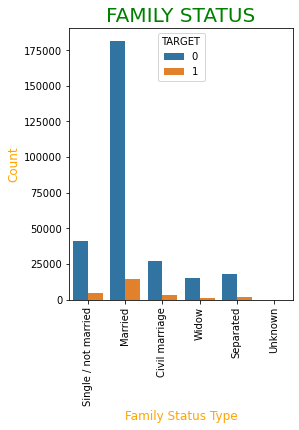

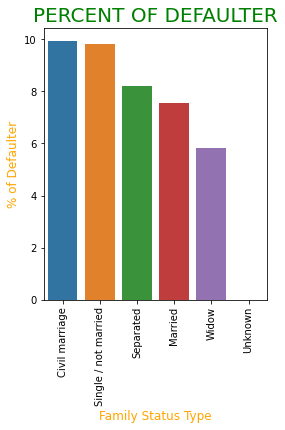

In [98]:
Target_Percent=inp0[["NAME_FAMILY_STATUS","TARGET"]].groupby(["NAME_FAMILY_STATUS"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(4,5))
sns.countplot(data=inp0, x="NAME_FAMILY_STATUS", hue="TARGET")
plt.xlabel("Family Status Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'orange'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'orange'})
plt.title("FAMILY STATUS",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(4,5))
sns.barplot(data=Target_Percent, x="NAME_FAMILY_STATUS", y="TARGET", order=Target_Percent["NAME_FAMILY_STATUS"])
plt.xticks(rotation=90)
plt.xlabel("Family Status Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'orange'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'orange'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()


Analysis of NAME_HOUSING_TYPE vs TARGET Column


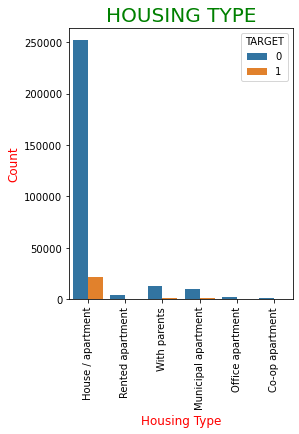

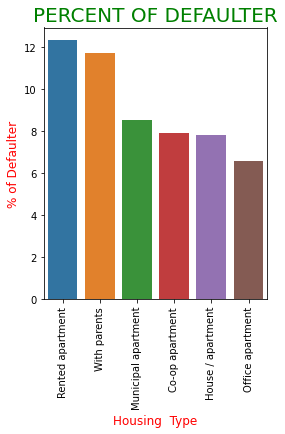

In [99]:
Target_Percent=inp0[["NAME_HOUSING_TYPE","TARGET"]].groupby(["NAME_HOUSING_TYPE"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(4,5))
sns.countplot(data=inp0, x="NAME_HOUSING_TYPE", hue="TARGET")
plt.xlabel("Housing Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.title("HOUSING TYPE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'GREEN'})
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(4,5))
sns.barplot(data=Target_Percent, x="NAME_HOUSING_TYPE", y="TARGET", order=Target_Percent["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.xlabel("Housing  Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'RED'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'RED'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()


Analysis of OCCUPATION_TYPE vs TARGET Column

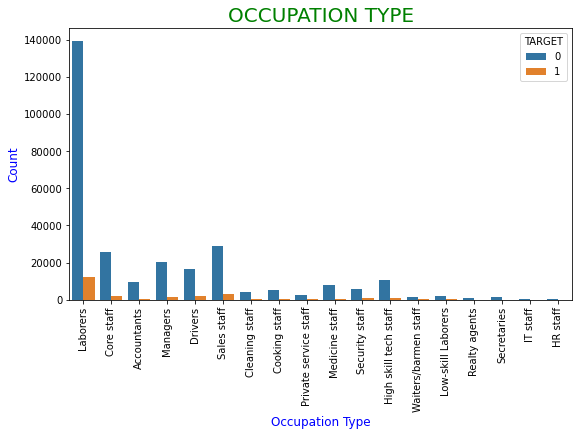

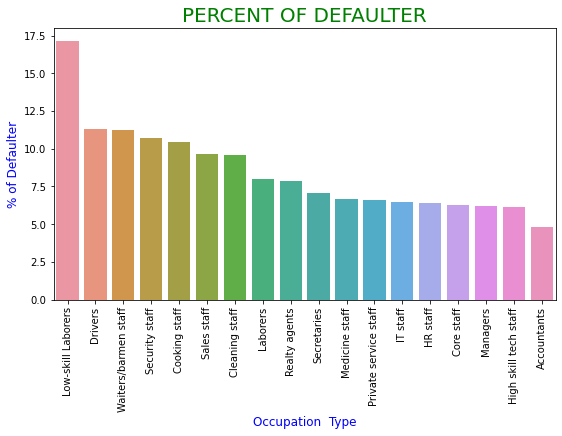

In [100]:
Target_Percent=inp0[["OCCUPATION_TYPE","TARGET"]].groupby(["OCCUPATION_TYPE"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(9,5))
sns.countplot(data=inp0, x="OCCUPATION_TYPE", hue="TARGET")
plt.xlabel("Occupation Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("OCCUPATION TYPE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'GREEN'})
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(data=Target_Percent, x="OCCUPATION_TYPE", y="TARGET", order=Target_Percent["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.xlabel("Occupation  Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()


Analysis of CNT_FAM_MEMBERS vs TARGER Column

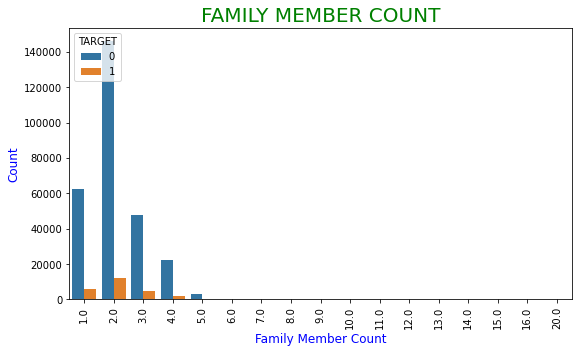

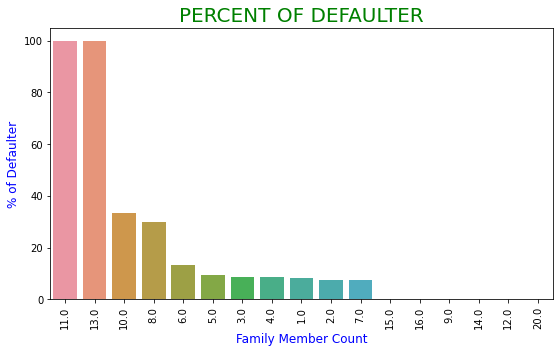

In [101]:
Target_Percent=inp0[["CNT_FAM_MEMBERS","TARGET"]].groupby(["CNT_FAM_MEMBERS"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(9,5))
sns.countplot(data=inp0, x="CNT_FAM_MEMBERS", hue="TARGET")
plt.xlabel("Family Member Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("FAMILY MEMBER COUNT",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'GREEN'})
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(data=Target_Percent, x="CNT_FAM_MEMBERS", y="TARGET", order=Target_Percent["CNT_FAM_MEMBERS"])
plt.xticks(rotation=90)
plt.xlabel("Family Member Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'GREEN'})
plt.show()


Analysis of REGION_RATING_CLIENT vs TARGET Column

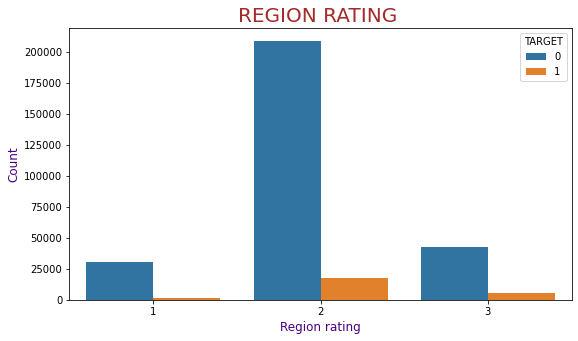

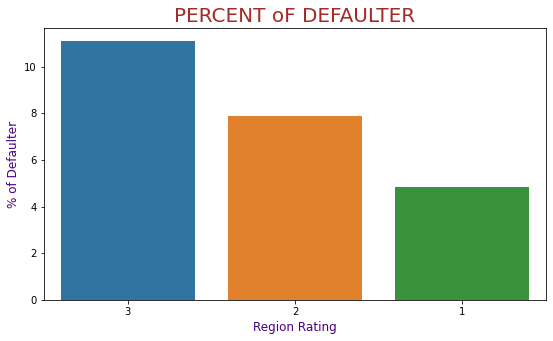

In [102]:
Target_Percent=inp0[["REGION_RATING_CLIENT","TARGET"]].groupby(["REGION_RATING_CLIENT"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(9,5))
sns.countplot(data=inp0, x="REGION_RATING_CLIENT", hue="TARGET")
plt.xlabel("Region rating",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("REGION RATING ",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(data=Target_Percent, x="REGION_RATING_CLIENT", y="TARGET", order=Target_Percent["REGION_RATING_CLIENT"])
plt.xlabel("Region Rating",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("PERCENT oF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'BROWN'})
plt.show()


Analysis of ORGANIZATION_TYPE vs TARGET Column

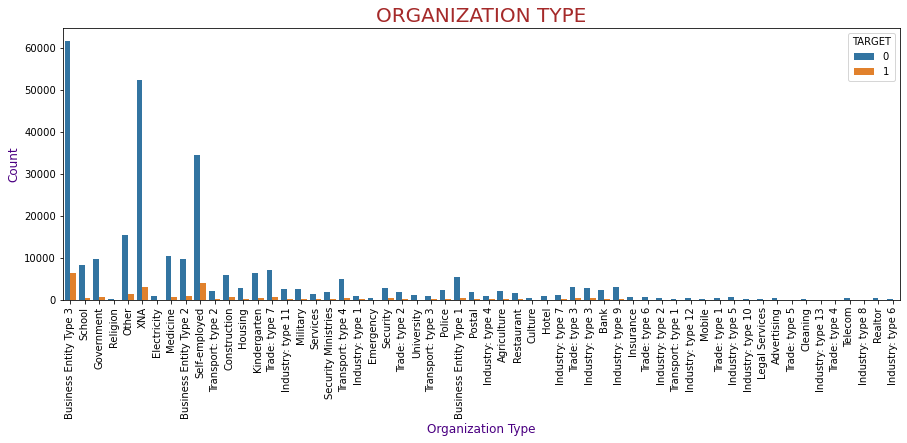

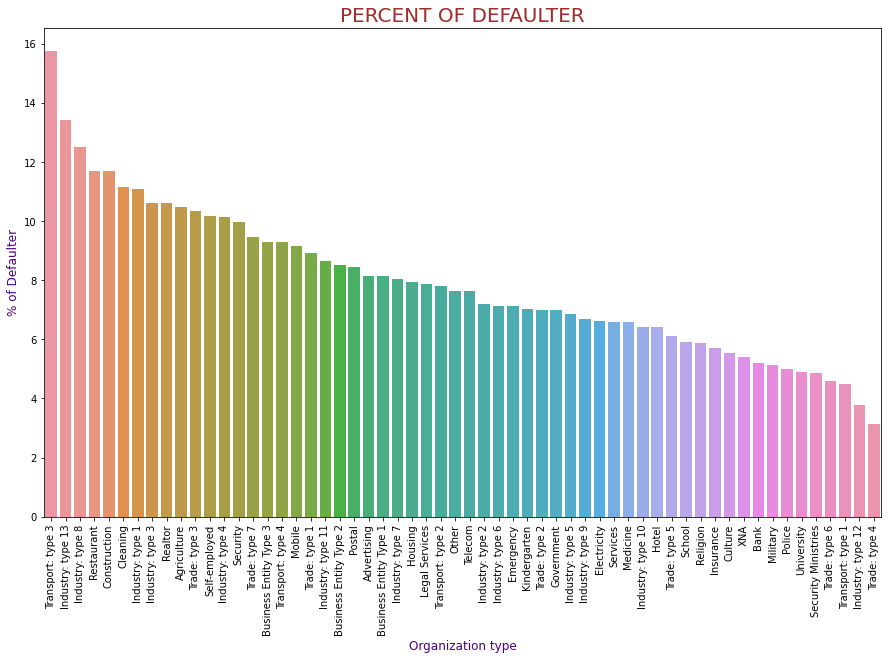

In [103]:
Target_Percent=inp0[["ORGANIZATION_TYPE","TARGET"]].groupby(["ORGANIZATION_TYPE"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(15,5))
sns.countplot(data=inp0, x="ORGANIZATION_TYPE", hue="TARGET")
plt.xticks(rotation=90)
plt.xlabel("Organization Type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("ORGANIZATION TYPE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'BROWN'})
plt.show()

plt.figure(figsize=(15,9))
sns.barplot(data=Target_Percent, x="ORGANIZATION_TYPE", y="TARGET", order=Target_Percent["ORGANIZATION_TYPE"])
plt.xticks(rotation=90)
plt.xlabel("Organization type",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'BROWN'})
plt.show()


Analysis of DAYS_BIRTH vs TARGET Column

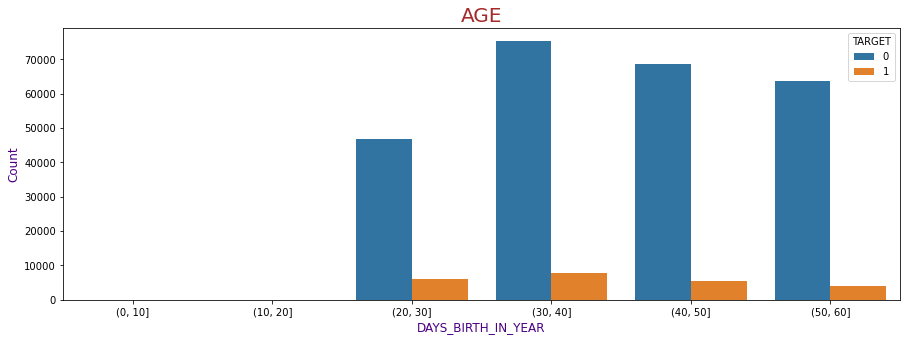

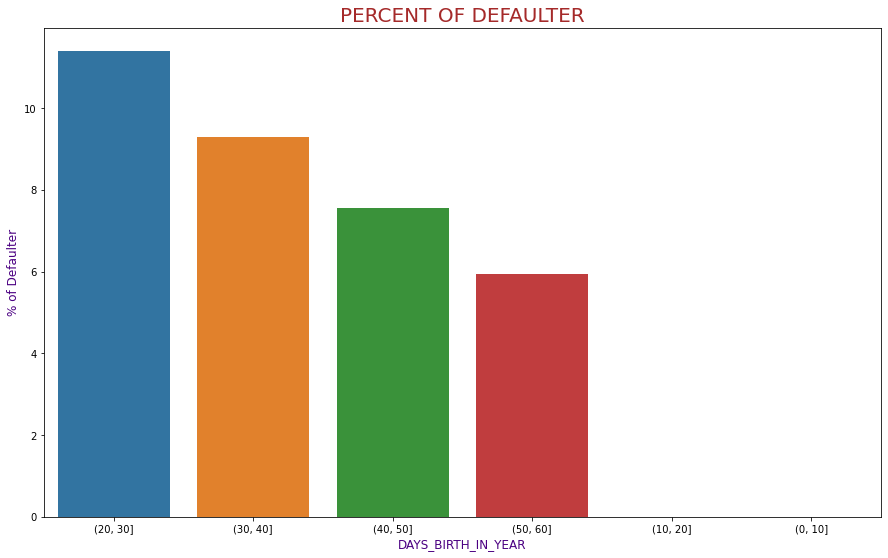

In [104]:
Target_Percent=inp0[["DAYS_BIRTH_IN_YEAR","TARGET"]].groupby(["DAYS_BIRTH_IN_YEAR"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(15,5))
sns.countplot(data=inp0, x="DAYS_BIRTH_IN_YEAR", hue="TARGET")
plt.xlabel("DAYS_BIRTH_IN_YEAR",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("AGE",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'BROWN'})
plt.show()

plt.figure(figsize=(15,9))
sns.barplot(data=Target_Percent, x="DAYS_BIRTH_IN_YEAR", y="TARGET", order=Target_Percent["DAYS_BIRTH_IN_YEAR"])
plt.xlabel("DAYS_BIRTH_IN_YEAR",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'BROWN'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.show()

Analysis of DAYS_EMPLOYED vs TARGET Column

In [105]:
# Creating Bins for DAYS_EMPLOYED column for analysing it.
Bins_range=[0,5,10,15,20,25,30,35,40,45,50,55,60]
LABEL=["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","60 Above"]
inp0["DAYS_EMPLOYED_IN_YEAR"]=pd.cut(inp0["DAYS_EMPLOYED"], Bins_range, LABEL)

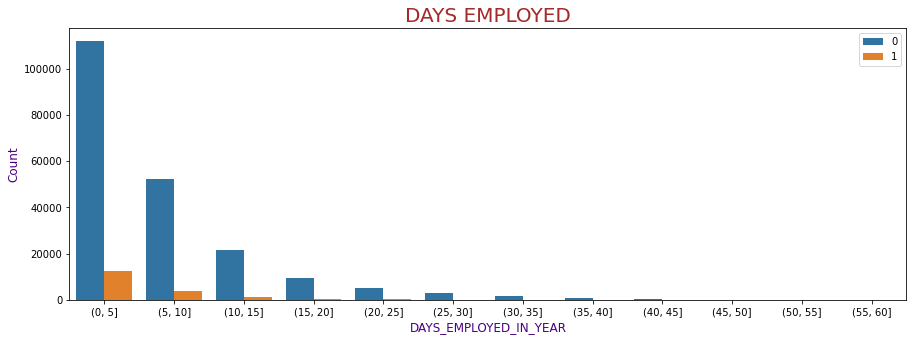

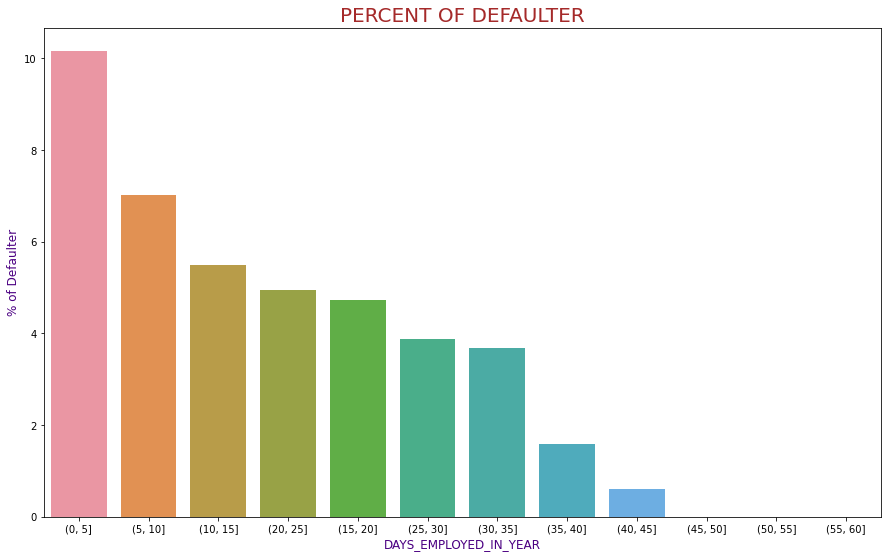

In [106]:
Target_Percent=inp0[["DAYS_EMPLOYED_IN_YEAR","TARGET"]].groupby(["DAYS_EMPLOYED_IN_YEAR"], as_index=False).mean()
Target_Percent["TARGET"]=Target_Percent["TARGET"]*100
Target_Percent.sort_values(by="TARGET", ascending=False, inplace=True)


plt.figure(figsize=(15,5))
sns.countplot(data=inp0, x="DAYS_EMPLOYED_IN_YEAR", hue="TARGET")
plt.xlabel("DAYS_EMPLOYED_IN_YEAR",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("Count",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.legend(loc="upper right")
plt.title("DAYS EMPLOYED",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
plt.show()

plt.figure(figsize=(15,9))
sns.barplot(data=Target_Percent, x="DAYS_EMPLOYED_IN_YEAR", y="TARGET", order=Target_Percent["DAYS_EMPLOYED_IN_YEAR"])
plt.xlabel("DAYS_EMPLOYED_IN_YEAR",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.ylabel("% of Defaulter",fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'indigo'})
plt.title("PERCENT OF DEFAULTER",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'BROWN'})
plt.show()

Analysis of numerical columns

In [110]:
Num_Col=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","EXT_SOURCE_2","EXT_SOURCE_3"]

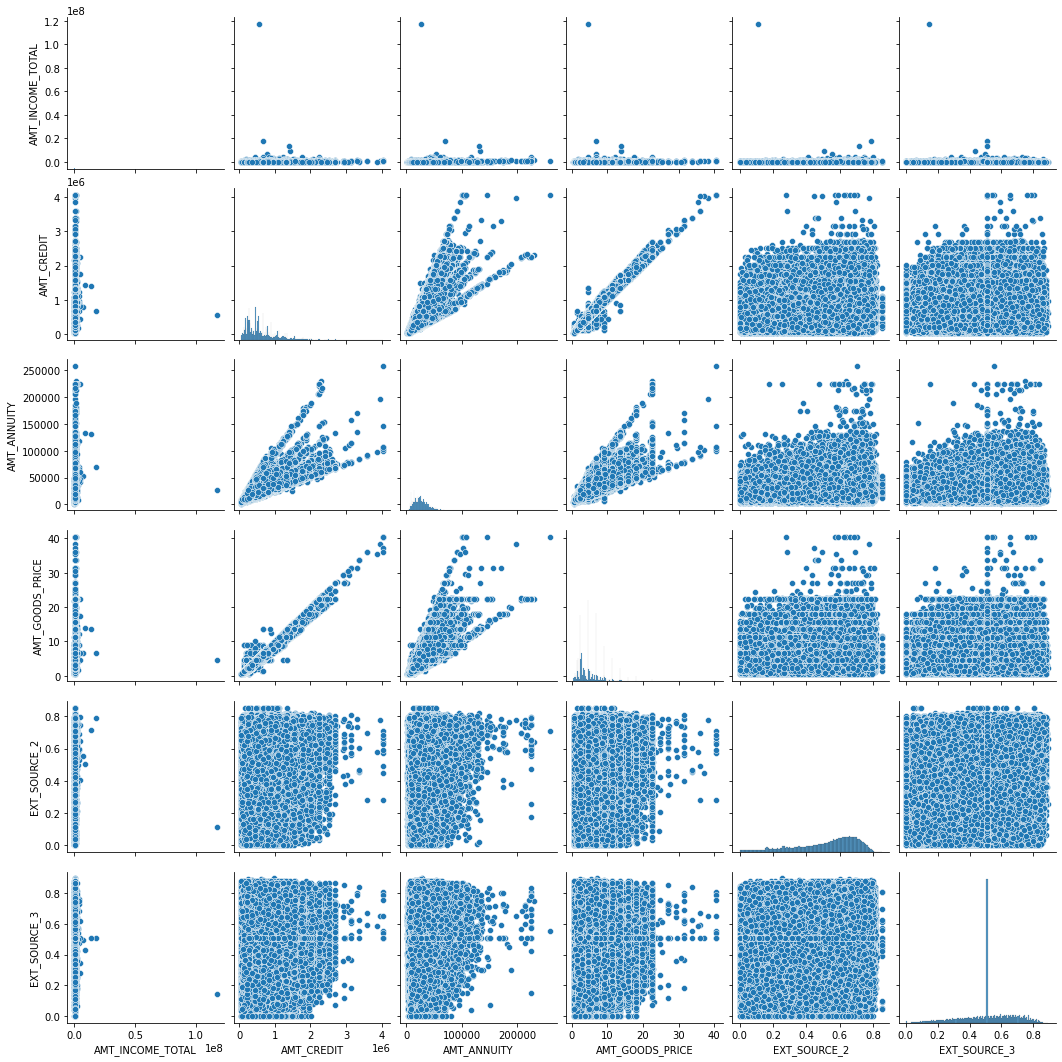

In [111]:
sns.pairplot(inp0[Num_Col])
plt.show()

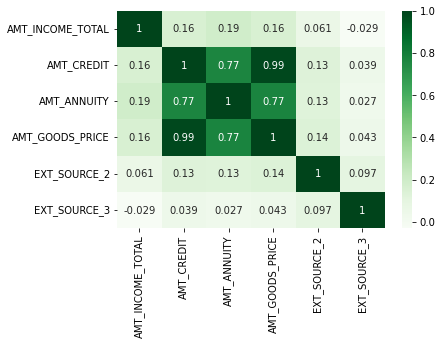

In [112]:
sns.heatmap(inp0[Num_Col]. corr(), annot=True, cmap="Greens")
plt.show()

# Multivariate Analysis

In [119]:
COL=["CNT_CHILDREN","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","CNT_FAM_MEMBERS","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","FLAG_DOCUMENT_3","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",
     "EXT_SOURCE_2","EXT_SOURCE_3"]

<AxesSubplot:>

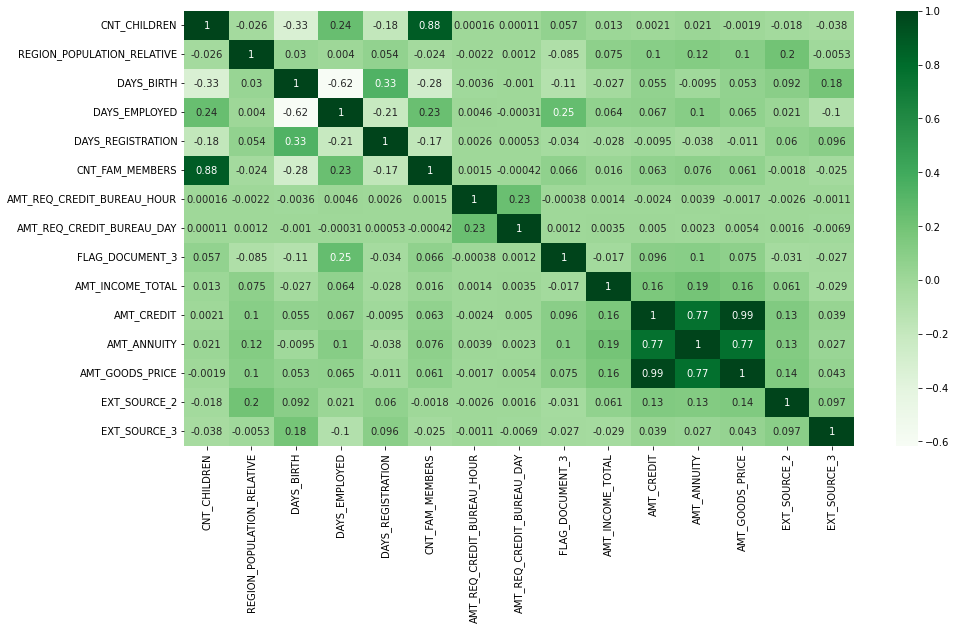

In [123]:
plt.figure(figsize=(15,8))
sns.heatmap(inp0[COL].corr(),cmap="Greens", annot=True)
plt.show()